In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Prepare the Data

In [2]:
# Import the data
csv_file = "myopia.csv"
myopia_data = pd.read_csv(csv_file)
myopia_data.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
myopia_data['MYOPIC'].unique()

array([1, 0])

In [4]:
# Drop the MYOPIC column
myopia_data_df = myopia_data.drop(["MYOPIC"], axis='columns')
myopia_data_df.head(10)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0
5,6,1.744,22.139999,3.224,3.556,15.36,10,6,2,1,19,44,0,1
6,6,0.683,22.330000,3.186,3.654,15.49,12,7,2,1,8,36,0,1
7,6,1.272,22.389999,3.732,3.584,15.08,12,0,0,0,8,8,0,0
8,7,1.396,22.620001,3.464,3.408,15.74,4,0,3,1,3,12,0,0
9,6,0.972,22.740000,3.504,3.696,15.54,30,5,1,0,10,27,0,0


In [5]:
# Find null values
for column in myopia_data_df.columns:
    print(f"Column {column} has {myopia_data_df[column].isnull().sum()} null values")

Column AGE has 0 null values
Column SPHEQ has 0 null values
Column AL has 0 null values
Column ACD has 0 null values
Column LT has 0 null values
Column VCD has 0 null values
Column SPORTHR has 0 null values
Column READHR has 0 null values
Column COMPHR has 0 null values
Column STUDYHR has 0 null values
Column TVHR has 0 null values
Column DIOPTERHR has 0 null values
Column MOMMY has 0 null values
Column DADMY has 0 null values


In [6]:
# Find duplicate entries
print(f"Duplicate entries: {myopia_data_df.duplicated().sum()}")

Duplicate entries: 0


In [7]:
myopia_data_df.dtypes

AGE            int64
SPHEQ        float64
AL           float64
ACD          float64
LT           float64
VCD          float64
SPORTHR        int64
READHR         int64
COMPHR         int64
STUDYHR        int64
TVHR           int64
DIOPTERHR      int64
MOMMY          int64
DADMY          int64
dtype: object

In [8]:
 # A list of the columns from the original DataFrame
myopia_data_df.columns

Index(['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY'],
      dtype='object')

In [9]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(myopia_data_df)
scaled_data

array([[-4.20219106e-01, -1.36391690e+00, -8.92861464e-01, ...,
         4.98303926e-01,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01, -3.08612235e-01, -1.71839800e-01, ...,
        -8.75087555e-01,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01,  6.04386289e-01, -9.97682023e-03, ...,
        -7.50233784e-01, -1.01302987e+00, -9.96768974e-01],
       ...,
       [-4.20219106e-01,  1.65169621e+00,  6.52187361e-01, ...,
        -1.37450264e+00,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01, -2.17472219e-01, -8.48716244e-01, ...,
        -1.88391815e-01, -1.01302987e+00, -9.96768974e-01],
       [-4.20219106e-01,  1.58339808e-03, -3.48415042e-01, ...,
        -7.50233784e-01,  9.87137728e-01,  1.00324150e+00]])

In [10]:
# Create a DataFrame with the transformed data
scaled_data_df= pd.DataFrame(scaled_data, columns=myopia_data_df.columns)
scaled_data_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,0.987138,1.003241
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,0.987138,1.003241
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,-1.013030,-0.996769
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,-1.013030,1.003241
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,-0.996769


## Apply Dimensionality Reduction

In [11]:
# Initialize PCA model
pca = PCA(n_components=0.99)

# Get two principal components for the data.
myopia_pca = pca.fit_transform(scaled_data_df)


In [12]:
myopia_pca[0]

array([ 0.53550271,  1.14500427, -1.38501894,  0.11600593, -3.22669052,
       -1.92845879, -1.95889156, -1.92299652,  0.02675285,  0.17814386,
       -1.3891124 , -0.57490916])

In [13]:
# Transform PCA data to a DataFrame
df_myopia_pca = pd.DataFrame(
    data=myopia_pca, columns=["principal component 1", "principal component 2","principal component 3", 
                              "principal component 4","principal component 5", "principal component 6",
                             "principal component 7", "principal component 8","principal component 9", 
                              "principal component 10","principal component 11", "principal component 12"]
)
df_myopia_pca.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11,principal component 12
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,-1.389112,-0.574909
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,-0.118153,0.527492
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,-0.287739,0.128478
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,0.652956,-0.672679
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,0.007640,0.995370


In [14]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566,
       0.04286506, 0.03839767])

In [15]:
 # Initialize t-SNE model
tsne = TSNE(learning_rate=35)

In [16]:
 # Reduce dimensions
tsne_features = tsne.fit_transform(df_myopia_pca)

/Users/akhilkumarbandi/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [17]:
tsne_features.shape

(618, 2)

In [18]:
 # Prepare to plot the dataset

# The first column of transformed features
df_myopia_pca['x'] = tsne_features[:,0]

# The second column of transformed features
df_myopia_pca['y'] = tsne_features[:,1]

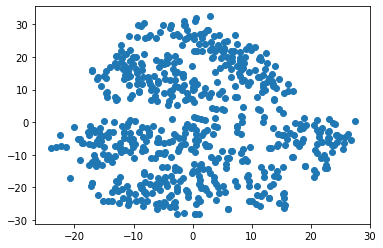

In [19]:
# Visualize the clusters
plt.scatter(df_myopia_pca['x'], df_myopia_pca['y'])
plt.show()

## Perform a Cluster Analysis with K-means

In [20]:
# Identify the best number of clusters using the elbow curve

inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_myopia_pca)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,240084.090812
1,2,122703.341902
2,3,77186.121521
3,4,61476.275689
4,5,49626.992505


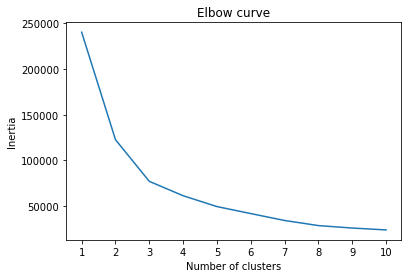

In [21]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve')
plt.show()

In [22]:
# Initialize the K-Means model with K = 3
model = KMeans(n_clusters=3, random_state=5)

In [23]:
# Fitting the model
model.fit(df_myopia_pca)

KMeans(n_clusters=3, random_state=5)

In [24]:
# Predict clusters
predictions = model.predict(df_myopia_pca)
print(predictions)

[1 1 2 2 1 2 2 2 2 2 0 1 2 2 1 2 2 2 0 2 2 2 2 2 2 2 1 1 1 1 1 0 1 2 1 2 0
 2 2 2 1 2 0 0 1 2 0 2 1 0 1 2 2 1 2 2 1 0 2 2 2 1 0 2 0 0 2 2 2 2 0 0 0 2
 2 1 2 0 2 2 1 2 1 1 2 1 1 0 1 1 2 2 1 2 2 0 2 1 1 2 0 2 0 2 1 2 2 2 1 2 0
 2 0 0 1 1 2 2 1 2 1 2 1 2 0 0 2 1 1 1 1 2 2 2 1 2 2 1 2 2 1 2 1 2 1 0 2 0
 1 0 1 2 0 0 2 2 1 0 1 1 2 2 0 2 1 0 0 2 0 2 1 1 0 2 1 2 1 1 1 1 2 0 2 1 2
 0 1 1 2 1 1 1 1 2 1 2 2 2 1 1 1 1 2 2 2 1 1 2 1 1 0 1 1 1 1 0 0 2 2 0 1 2
 0 2 2 2 0 0 2 2 0 0 1 0 1 1 1 2 2 2 0 1 2 2 1 2 1 1 0 2 2 0 1 0 1 1 1 1 0
 2 0 2 1 0 1 2 1 1 2 2 2 2 0 0 2 1 2 1 0 1 0 0 1 0 1 1 2 1 2 2 2 2 1 2 0 2
 2 2 0 2 2 1 1 0 1 1 0 2 2 0 1 1 2 1 1 1 1 2 1 0 2 1 1 0 1 2 2 1 2 2 2 1 2
 1 1 2 1 1 2 2 2 0 2 1 1 1 1 0 0 2 2 2 1 2 2 2 1 2 1 2 1 1 2 2 2 1 2 2 2 2
 1 2 2 1 0 1 2 2 1 2 0 1 2 2 1 0 2 0 1 0 1 0 2 1 1 2 2 1 2 2 2 2 0 0 0 2 0
 0 0 2 1 1 1 0 2 2 1 2 2 2 1 0 2 1 0 1 2 1 1 2 0 1 2 2 1 0 1 0 1 0 1 1 2 0
 1 2 0 1 2 0 0 0 1 0 2 0 2 2 1 0 1 2 2 1 0 2 1 0 2 1 1 0 2 1 0 1 1 2 2 0 1
 1 1 0 2 1 2 0 0 0 0 2 2 

In [25]:
# Create return DataFrame with predicted clusters
df_myopia_pca["class"] = model.labels_
df_myopia_pca.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11,principal component 12,x,y,class
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,-1.389112,-0.574909,6.020786,-26.685087,1
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,-0.118153,0.527492,-6.127573,-19.139753,1
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,-0.287739,0.128478,5.531403,17.630619,2
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,0.652956,-0.672679,-10.577708,7.521742,2
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,0.007640,0.995370,-2.026975,-7.122189,1


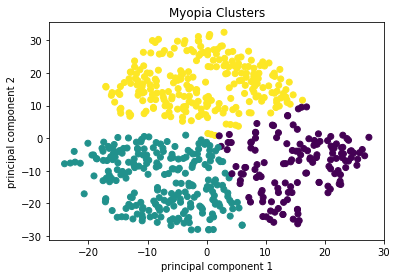

In [26]:
#Scatter plot
plt.scatter(x=df_myopia_pca['x'], y=df_myopia_pca['y'], c=df_myopia_pca['class'])
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.title('Myopia Clusters')
plt.show()

## Make a Recommendation

### Based on the above results, the elbow curve and scatter plot show that patients can be clustered into 3 different gropus.